In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler


# import data

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train.head(100)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.00,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.0708,NaN,C


In [4]:
gender = pd.read_csv('gender_submission.csv')

In [5]:
gender.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [6]:
test = pd.read_csv('test.csv')

In [7]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# PrePro


## basic statistic value

In [8]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
sex_female = (train['Sex'] == 'female')
train.loc[train['Sex'] == 'male', 'Sex'] = 1

In [10]:
sex_male = (train['Sex'] == 'male')
train.loc[train['Sex'] == 'female', 'Sex'] = 0

In [11]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


## Correlations

### corr between all of variables
#### under writing

In [12]:
train_corr = train.corr()
train_corr

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.369226,0.083081,0.018443,-0.549500
Sex,0.042939,-0.543351,0.131900,1.000000,0.093254,-0.114631,-0.245489,-0.182333
Age,0.036847,-0.077221,-0.369226,0.093254,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,-0.182333,0.096067,0.159651,0.216225,1.000000


In [13]:
train_corr.to_csv("train_corr.csv")

### corr between survived and all of variables

In [14]:
surv_all_corr = train_corr['Survived']
np.fabs(surv_all_corr)

PassengerId    0.005007
Survived       1.000000
Pclass         0.338481
Sex            0.543351
Age            0.077221
SibSp          0.035322
Parch          0.081629
Fare           0.257307
Name: Survived, dtype: float64

## drop off and decide useful variables

In [15]:
train_dropped = train.drop(["PassengerId", "Name","Survived", "Ticket", "Cabin","Embarked"], axis =1)

In [16]:
train_dropped.head(50)

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,22.0,1,0,7.2500
1,1,0,38.0,1,0,71.2833
2,3,0,26.0,0,0,7.9250
3,1,0,35.0,1,0,53.1000
4,3,1,35.0,0,0,8.0500
5,3,1,NaN,0,0,8.4583
6,1,1,54.0,0,0,51.8625
7,3,1,2.0,3,1,21.0750
8,3,0,27.0,0,2,11.1333
9,2,0,14.0,1,0,30.0708


## judge, count and substitution "NaN"

In [17]:
print(train_dropped.isnull())

     Pclass    Sex    Age  SibSp  Parch   Fare
0     False  False  False  False  False  False
1     False  False  False  False  False  False
2     False  False  False  False  False  False
3     False  False  False  False  False  False
4     False  False  False  False  False  False
5     False  False   True  False  False  False
6     False  False  False  False  False  False
7     False  False  False  False  False  False
8     False  False  False  False  False  False
9     False  False  False  False  False  False
10    False  False  False  False  False  False
11    False  False  False  False  False  False
12    False  False  False  False  False  False
13    False  False  False  False  False  False
14    False  False  False  False  False  False
15    False  False  False  False  False  False
16    False  False  False  False  False  False
17    False  False   True  False  False  False
18    False  False  False  False  False  False
19    False  False   True  False  False  False
20    False  

### Age substitution
plot correlation  
Age prediction model  
    goal variable = Age  
    exp, variables = others  
prediction  
substitution

In [18]:
print(train_dropped.isnull().sum()) 
#ageやばい
#nan含むage全部かっとするとtrain数が激減→要補間

Pclass      0
Sex         0
Age       177
SibSp       0
Parch       0
Fare        0
dtype: int64


In [21]:
type(train_dropped)

pandas.core.frame.DataFrame

In [24]:
train_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
Pclass    891 non-null int64
Sex       891 non-null int64
Age       714 non-null float64
SibSp     891 non-null int64
Parch     891 non-null int64
Fare      891 non-null float64
dtypes: float64(2), int64(4)
memory usage: 41.8 KB


In [26]:
train_dropped.shape

(891, 6)

Make model w/ Age non-null group  
to predict Age by other features

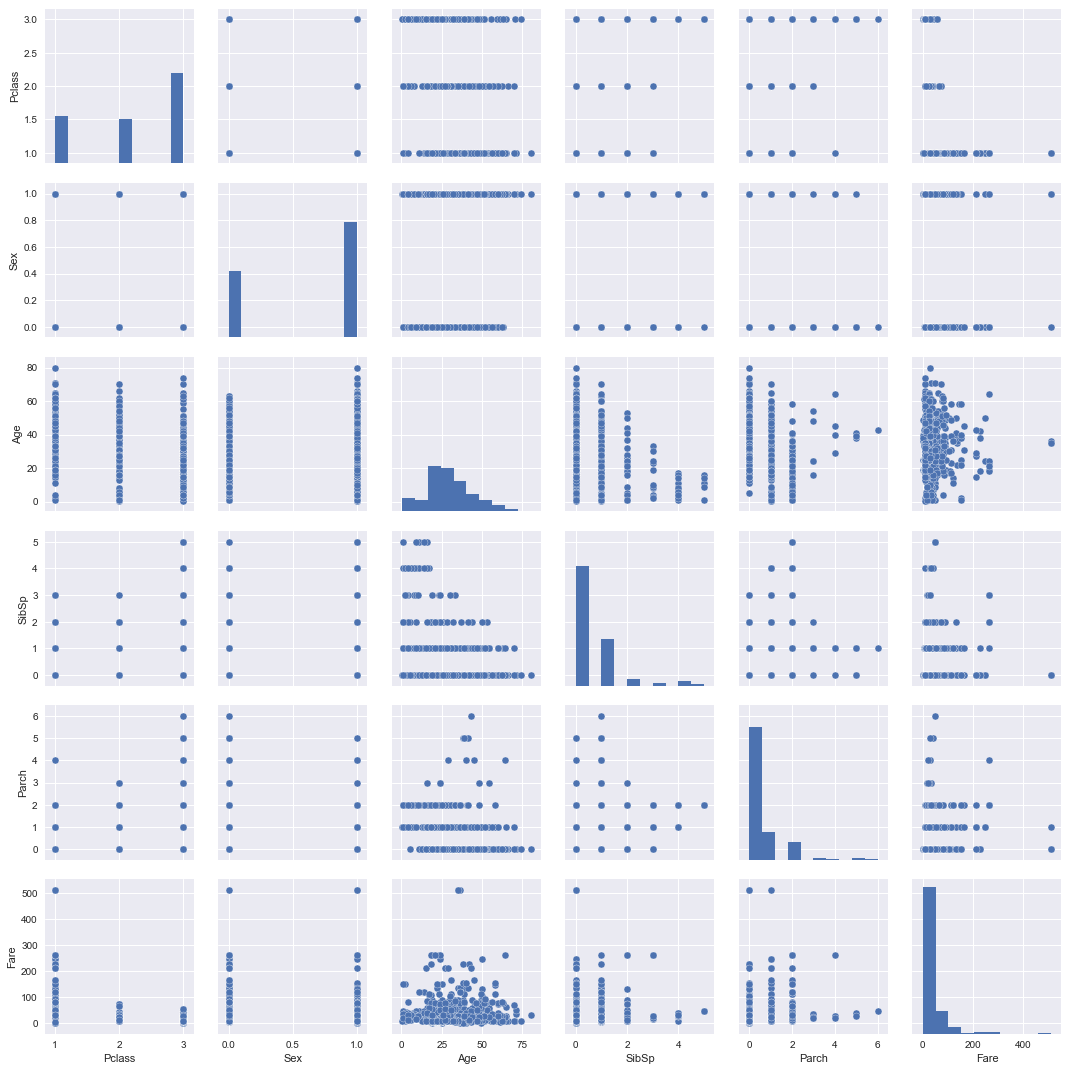

In [30]:
train_dropped.dropna(axis =0, how = 'any', inplace = True)
sns.pairplot(train_dropped)

In [ ]:
#tdm = round(train_dropped['Age'].mean()tdm = round(train_dropped['Age'].mean()＃)
#tdm

In [ ]:
#train_dropped['Age'].fillna(tdm, inplace = True)
#train_dropped.head(50)

# Logistic regression exe

## modeling

In [ ]:
sc = StandardScaler()
train_dropped_columns = train_dropped.columns
train_dropped = sc.fit_transform(train_dropped) #標準化の実行　この時にarray型になってしまうので、行列名すべて消える
train_dropped = pd.DataFrame(train_dropped) #データフレーム型への変更
train_dropped.columns = train_dropped_columns #列名に事前に取得しておいた列名を代入
train_dropped.head()

In [ ]:
ob_var = train['Survived']

In [ ]:
exp_var = train_dropped

In [ ]:
clf = LogisticRegression()
clf.fit(exp_var, ob_var)

In [ ]:
test.head()

In [ ]:
test_dropped = test.drop(["PassengerId", "Name", "Ticket", "Cabin","Embarked"], axis =1)

In [ ]:
sex_male = (test_dropped['Sex'] == 'female')
test_dropped.loc[test_dropped['Sex'] == 'female', 'Sex'] = 0

In [ ]:
sex_male = (test_dropped['Sex'] == 'male')
test_dropped.loc[test_dropped['Sex'] == 'male', 'Sex'] = 1

In [ ]:
test_dropped

In [ ]:
tdm = round(test_dropped['Age'].mean())
print(tdm)

In [ ]:
test_dropped['Age'].fillna(tdm, inplace = True)

In [ ]:
tdm_t = round(test_dropped['Fare'].mean())
tdm_t

In [ ]:
test_dropped['Fare'].fillna(tdm_t, inplace = True)

In [ ]:
#test_dropped.dropna(inplace = True)
#test_dropped.isnull().sum()

In [ ]:
sc = StandardScaler()
test_dropped_columns = test_dropped.columns
test_dropped = sc.fit_transform(test_dropped) #標準化の実行　この時にarray型になってしまうので、行列名すべて消える
test_dropped = pd.DataFrame(test_dropped) #データフレーム型への変更
test_dropped.columns = test_dropped_columns #列名に事前に取得しておいた列名を代入
test_dropped.head()


In [ ]:
prediction = clf.predict(test_dropped)

In [ ]:
gender.head()

In [ ]:
gender['Survived'] = prediction

In [ ]:
gender.head()

In [ ]:
gender.to_csv('first_sub.csv')